In [2]:
%reset -f
%load_ext autoreload
%autoreload 2
from mechanics import *

system = (
    LagrangeSystem()
    .add_coordinate(r'\theta', space=S)
    .add_constant('m g l')
    .define('x y', 'l * sin(theta), - l * cos(theta)')
    .define('T', 'm/2 * (dot(x)**2 + dot(y)**2)')
    .define('U', 'm * g * y')
    .define('L', 'T - U')
    .define('E', 'T + U')
    .euler_lagrange_equation('L')
)
system.show_all()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
from mechanics.integrator import *
system_d = (
    system.discretization()
    # .add_constant('h')
    # .add_constant('N', space=Z)
    .uniform_space('t', 'i', 0, 'N', 'h')
    .apply(Euler('h'))
    .doit()
)
system_d.show_all()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Indices: (i,)
Input: (\theta(0,), \dot{\theta}(0,))
Index combinations: ({i: 0}, {i: i}, {i: N})
Input on this combo: {i: 0}, {\theta(i,), \dot{\theta}(i,)}


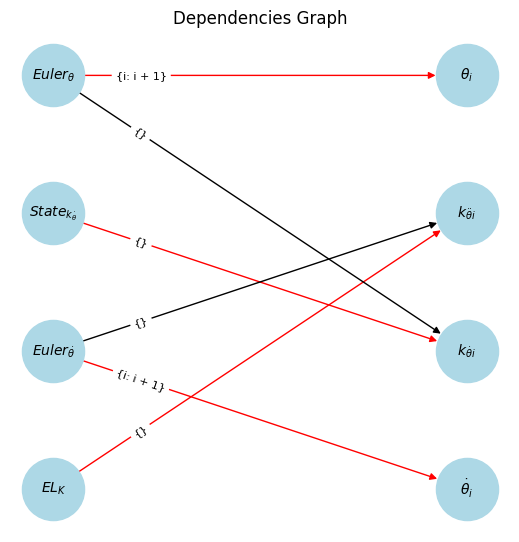

output: {\theta(i + 1,), {k_{\ddot{\theta}}}(i,), \dot{\theta}(i + 1,), {k_{\dot{\theta}}}(i,)}
True
defaultdict(<class 'dict'>, {{EL}_{K}: -g*l*m*sin(\theta(i,)) - l**2*m*{k_{\ddot{\theta}}}(i,) = 0: {{k_{\ddot{\theta}}}(i,): -l**2*m}})
defaultdict(<class 'dict'>, {State_{{k_{\dot{\theta}}}}: \dot{\theta}(i,) = {k_{\dot{\theta}}}(i,): {{k_{\dot{\theta}}}(i,): -1}})
defaultdict(<class 'dict'>, {{Euler}_{\dot{\theta}}: \dot{\theta}(i + 1,) = \dot{\theta}(i,) + h*{k_{\ddot{\theta}}}(i,): {\dot{\theta}(i + 1,): 1}})
defaultdict(<class 'dict'>, {{Euler}_{\theta}: \theta(i + 1,) = \theta(i,) + h*{k_{\dot{\theta}}}(i,): {\theta(i + 1,): 1}})
Stage(indices={i: 0}, inputs=[\theta(i,), \dot{\theta}(i,)])):
  Block #0(equations=('{EL}_{K}',), variables=[{k_{\ddot{\theta}}}(i,)], unknowns=[{k_{\ddot{\theta}}}(i,)]), knowns=[\theta(i,), \dot{\theta}(i,)], indices=[i])
  Block #1(equations=('State_{{k_{\\dot{\\theta}}}}',), variables=[{k_{\dot{\theta}}}(i,)], unknowns=[{k_{\dot{\theta}}}(i,)]), kno

ld: warning: ignoring duplicate libraries: '-lgfortran'


In [134]:
solver = system_d.solver()

In [141]:
import numpy as np
result = solver.run({
    'l': 1,
    'm': 1,
    'g': 1,
    'N': 100000,
    'h': 0.001,
    'theta[0]': np.pi/4,
    'dottheta[0]': 0,
})
# result.newton_converged_iters

Condition: {l: 1, m: 1, g: 1, N: 100000, h: 0.001, \theta(0,): 0.7853981633974483, \dot{\theta}(0,): 0}
 Running solver with condition:    100000.00000000000        1.0000000000000000E-003   1.0000000000000000        1.0000000000000000        1.0000000000000000       0.78539816339744828        0.0000000000000000     
 Started
 Output in /Users/yuuki.fj/Develop/mechanics/examples/result/20250718_181140/
 Calculating definitions
 Completed


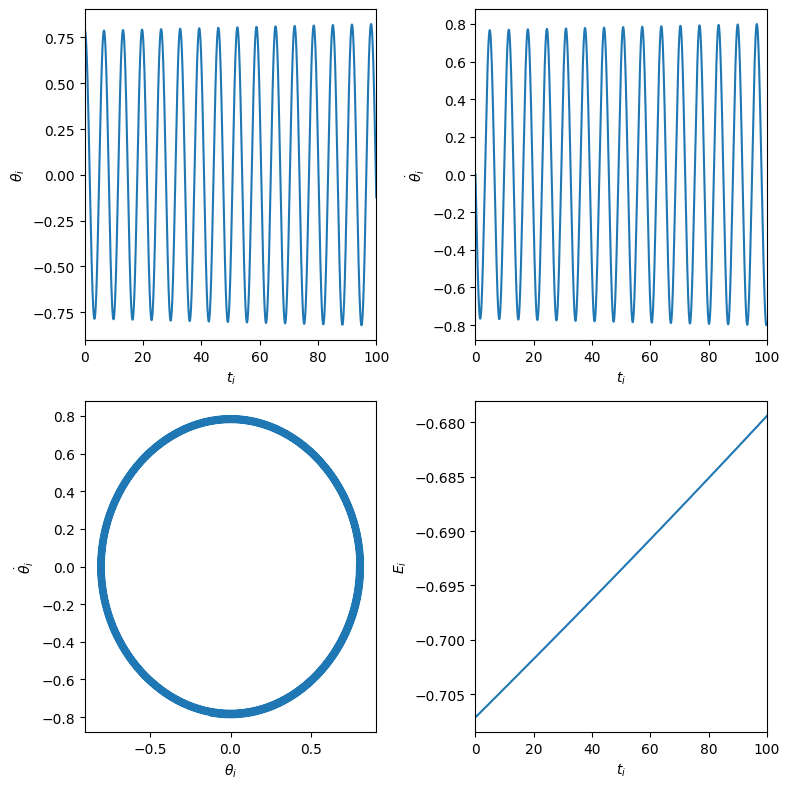

In [142]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(8, 8), layout='tight', subplot_kw={'projection': result})
axes = axes.flatten()

axes[0].plot('theta')
axes[1].plot('dottheta')
axes[2].plot('theta', 'dottheta')
axes[3].plot('E')